# Simple Linear Regression Using the Ames Housing Dataset

 This notebook demonstrates a simple linear regression workflow using the Ames Housing dataset, a widely used dataset for exploring foundational machine learning concepts. The project covers data loading, exploratory data analysis, basic feature manipulations, and fitting a linear regression model to predict housing prices. This serves as a practical example of applying core regression techniques to real-world data.



## About the Dataset

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.


## Part 1: Exploratory Data Analysis

### Data Loading & Overview

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv') #import from URL for notebook portability


In [11]:
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


In [12]:
data_shape = df.shape
print(f"num samples={data_shape[0]}, num mattributes={data_shape[1]}")


num samples=2930, num mattributes=15


In [13]:
df = df.dropna() # drop rows with missing values
df.head(6)
df.index #2 records have been dropped

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929],
      dtype='int64', length=2928)

### Basic Statistics

In [21]:
y = df['SalePrice'].values 
mean_price = np.mean(y)
print(f"The mean house price is: ${np.round(mean_price, 2) * 1000:,.2f}")

homes_over_120 = np.sum(y > 120)
frac_homes_120 = np.sum(y > 120) / y.size
print(f"The proportion of homes worth over $120k is {round(frac_homes_120, 2)*100}%")

min_price = np.min(y)
max_price = np.max(y)
print(f"The minimum house price is: ${np.round(min_price, 2) * 1000:,.2f}")
print(f"The maximum house price is: ${np.round(max_price, 2) * 1000:,.2f}")

The mean house price is: $180,840.00
The proportion of homes worth over $120k is 82.0%
The minimum house price is: $12,790.00
The maximum house price is: $755,000.00


### Initial Data Visualization

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

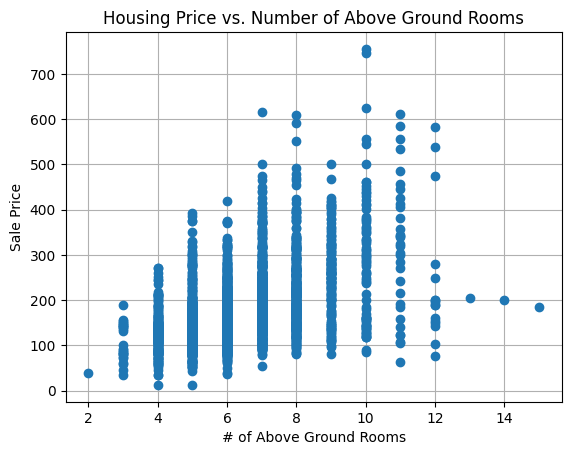

In [18]:
# Create a predictor variable, x
# TotRms AbvGrd = Total Rooms Above Ground (non-basement rooms)
x = df['TotRms AbvGrd'].values

# plot the data
plt.plot(x, y, 'o')
plt.grid(True)
plt.xlabel("# of Above Ground Rooms")
plt.ylabel("Sale Price")
plt.title("Housing Price vs. Number of Above Ground Rooms")
plt.show()


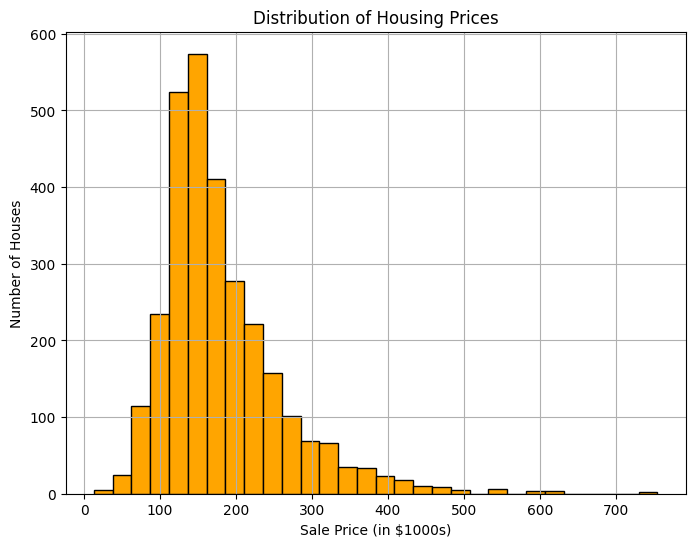

In [ ]:
plt.figure(figsize=(8,6)) # 8 inches wide, 6 inches tall
plt.hist(y, bins=30, edgecolor='black', color='orange')
plt.xlabel("Sale Price (in $1000s)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Housing Prices")
plt.grid(True)
plt.show() 


## Part 2: Linear Regression Implementation

Below is a simple function to perform a linear fit under the squared loss function (L2 Loss): $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2$.

The optimal parameters $\beta_0,\beta_1$ in the linear model $y =\beta_0 + \beta_1 x$ as well as the optimal loss are computed below.

In [24]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the optimal sum-of-squares loss
    """
   
    x_mean = np.mean(x) #mean num rooms
    y_mean = np.mean(y) #mean sale price

    s_xy = np.mean((x - x_mean)*(y - y_mean)) #covariance between x and y
    s_xx = np.mean((x - x_mean)**2) # variance of x

    # beta1: slope parameter
    beta1 = s_xy/s_xx  #ratio between Cov(x, y) and the Var(x)
    # beta0: intercept parameter
    beta0 = y_mean - beta1 * x_mean

    y_pred = beta0 + beta1 * x
    
    loss = np.sum((y - y_pred)**2)

    return beta0, beta1, loss

In [25]:
# Use the fit_linear function to compute the optimal parameters and loss
beta0, beta1, loss = fit_linear(x, y)
print(f"beta0 = {beta0:.2f}")
print(f"beta1 = {beta1:.2f}")
print(f"loss = {loss:,.2f}")


beta0 = 18.78
beta1 = 25.15
loss = 14,101,634.93


### Plot the Regression Line

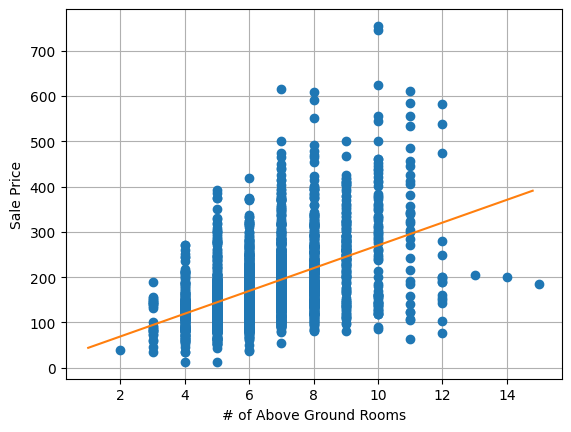

In [ ]:
x_regression_line = np.arange(1, 15, 0.2)
y_regression_line = beta0 + x_regression_line * beta1

plt.plot(x, y, 'o') # plot original scatter plot
plt.plot(x_regression_line, y_regression_line) #plot regression line
plt.grid(True)
plt.xlabel("# of Above Ground Rooms")
plt.ylabel("Sale Price")
plt.show()

## Part 3:  Comparing Different Dependent Variables

We next compute the squared loss for all the predictors and output the values in a table, so we can determine what predictor variables do the best job predicting house price?

In [26]:
#initialize final table
num_rows = df.shape[1] - 1 #each column from df becomes a row (excluding the 1 SalePrice column)
predictor_list = df.columns.tolist()[:-1] #exclude last column, SalePrice
zero_list = [0.0] * num_rows
sq_loss_table = pd.DataFrame({'Predictors': predictor_list, 'Losses': zero_list})

for index, predictor in enumerate(predictor_list):
    x = df[predictor].values
    __, __, loss = fit_linear(x, y)
    sq_loss_table.loc[index, 'Losses'] = round(loss, 2)  #assign loss value to the corresponding row for the predictor variable
    

print(sq_loss_table)

min_loss = sq_loss_table['Losses'].min() # get min loss value
min_row_index = sq_loss_table['Losses'].idxmin() #get the index of the row with the min loss value
best_predcitor = sq_loss_table.loc[min_row_index, 'Predictors']

print('\n')
print(f"The best predictor variable is {best_predcitor} with a loss value of {min_loss:,}")



       Predictors       Losses
0        Lot Area  17355552.13
1      Year Built  12857597.52
2     Bsmt Unf SF  18057043.35
3   Total Bsmt SF  11213377.81
4      1st Flr SF  11463538.46
5      2nd Flr SF  17325635.37
6     Gr Liv Area   9349292.71
7       Full Bath  13120702.49
8       Half Bath  17166315.15
9   Bedroom AbvGr  18296281.04
10  TotRms AbvGrd  14101634.93
11     Fireplaces  14478395.13
12    Garage Cars  10843473.27
13    Garage Area  11022825.04


The best predictor variable is Gr Liv Area with a loss value of 9,349,292.71


As indicated above, Gr Liv Area is the best predictor variable as it has the lowest loss value. Lower loss values means the average error (difference) between the observed sales price and the predicted sales prices (from the linear model/regression function) is lower and thus is better at predicting the sale price given a specific value for predictor variable.

## Part 4:  Comparing Different Loss Functions

### Alternative Brute Force Algorithm for Optimal (Minimized) Squared Loss

Instead of the closed form expressions for the optimal $\beta_0$ and $\beta_1$ used in `fit_linear` above, a brute force approach is implemented below to find the approximate minimized loss by searching over a grid of possible values for $\beta_0$ and $\beta_1$.

We search over the range [-50, 50] for $\beta_0$ in increments of 0.1.
We search over the range [-1, 1] for $\beta_1$ in increments of 0.005.

In [27]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the loss of the best beta0 and beta1 you found.
    """
    # define the grid of possible values for beta0 and beta1
    beta0_arr = np.arange(-50, 50, 0.1)
    beta1_arr = np.arange(-1, 2.5, 0.005)

    min_loss = float('inf') #initialize min_loss to large number
    
    #loop through each beta0 and beta1 pair
    for beta0 in beta0_arr:
        for beta1 in beta1_arr:
            y_pred = beta0 + beta1*x  #get array of predictions for (beta0, beta1) pair
            loss = np.sum((y - y_pred)**2)
            if loss < min_loss:
               min_loss = loss
               best_beta0 = beta0
               best_beta1 = beta1

    return best_beta0, best_beta1, min_loss



### Comparing the Output of `fit_approx` and `fit_linear` 


In [28]:
y = df['SalePrice'].values
x = df['Gr Liv Area'].values

beta0_fit_linear, beta1_fit_linear, loss_fit_linear = fit_linear(x, y)
print(f"The fit_linear function returns a loss of {loss_fit_linear:,.2f} with beta1={beta1_fit_linear:.5f}")

beta0_fit_approx, beta1_fit_approx, loss_fit_approx = fit_approx(x, y)
print(f"The fit_approx function returns a loss of {loss_fit_approx:,.2f} with beta1={beta1_fit_approx:.5f}")


The fit_linear function returns a loss of 9,349,292.71 with beta1=0.11170
The fit_approx function returns a loss of 9,351,446.56 with beta1=0.11000


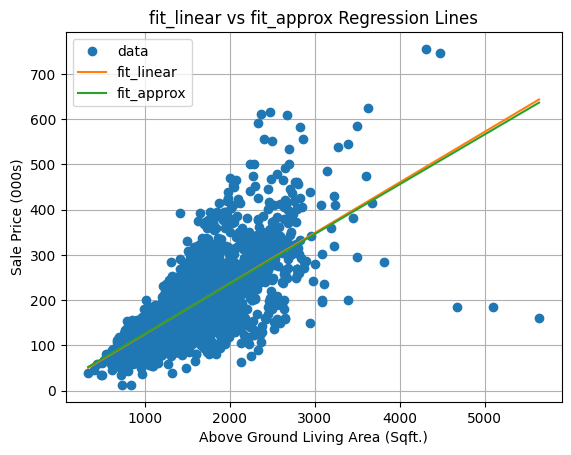

In [29]:
#plotting both regression lines

x_coordinates = np.arange(x.min(), x.max(), 1)
fit_linear_y_pred = beta0_fit_linear + x_coordinates * beta1_fit_linear
fit_approx_y_pred = beta0_fit_approx + x_coordinates * beta1_fit_approx

plt.plot(x, y, 'o') # plot original scatter plot
plt.plot(x_coordinates, fit_linear_y_pred) #plot fit_linear regression line
plt.plot(x_coordinates,fit_approx_y_pred) #plot fit_approx regression line
plt.grid(True)
plt.xlabel("Above Ground Living Area (Sqft.)")
plt.ylabel("Sale Price (000s)")
plt.title("fit_linear vs fit_approx Regression Lines")
plt.legend(['data', 'fit_linear', 'fit_approx'])
plt.show()



### Extending to Different Loss Functions: L1 Loss and L-infinity Loss

Below we implement different functions to minimize the following loss functios:
* the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x_i|$
* the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x_i|$


In [ ]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    
    A brute force approach is used to find the optimal beta0 and beta1 values.
    """


    beta0_arr = np.arange(-50, 50, 0.1)
    beta1_arr = np.arange(-1, 2.5, 0.005)

    min_loss = float('inf') #initialize min_loss to large number

    for beta0 in beta0_arr:
        for beta1 in beta1_arr:
            y_pred = beta0 + beta1*x  #get array of predictions for (beta0, beta1) pair
            loss = np.sum(abs((y - y_pred)))
            if loss < min_loss:
               min_loss = loss
               best_beta0 = beta0
               best_beta1 = beta1

    return best_beta0, best_beta1, min_loss

In [32]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.

    A brute force approach is used to find the optimal beta0 and beta1 values.
    """

    beta0_arr = np.arange(-50, 50, 0.1)
    beta1_arr = np.arange(-1, 2.5, 0.005)

    min_loss = float('inf') #initialize min_loss to large number

    for beta0 in beta0_arr:
        for beta1 in beta1_arr:
            y_pred = beta0 + beta1*x  #get array of predictions for (beta0, beta1) pair
            pair_max_loss = np.max(np.abs(y - y_pred))
            if pair_max_loss < min_loss:
               min_loss = pair_max_loss
               best_beta0 = beta0
               best_beta1 = beta1

    return best_beta0, best_beta1, min_loss

Below 3 different linear fits are computed for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. The resulting optimal parameters from each linear regression model are used to create the corresponding regression lines which are then plotted over a scatterplot of the original data.

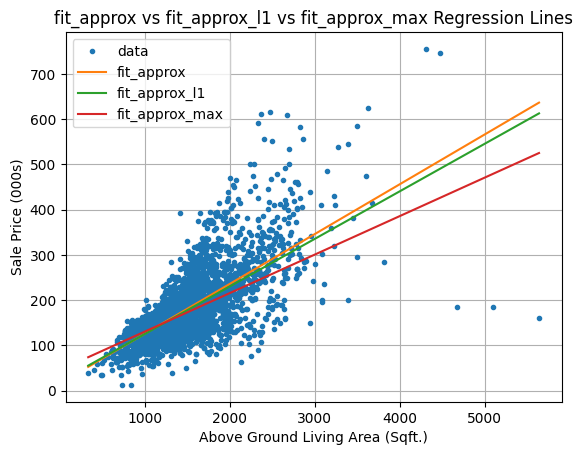

In [33]:
x_coordinates = np.arange(x.min(), x.max(), 1)

#get parameters and loss values
beta0_fit_approx, beta1_fit_approx, loss_fit_approx = fit_approx(x, y)
beta0_fit_approx_l1, beta1_fit_approx_l1, loss_fit_approx_l1 = fit_approx_l1(x, y)
beta0_fit_approx_max, beta1_fit_approx_max, loss_fit_approx_max = fit_approx_max(x, y)

#get predicted y values (SalePrice)
fit_approx_y_pred = beta0_fit_approx + x_coordinates * beta1_fit_approx
fit_approx_l1_y_pred = beta0_fit_approx_l1 + x_coordinates * beta1_fit_approx_l1
fit_approx_max_y_pred = beta0_fit_approx_max + x_coordinates * beta1_fit_approx_max


plt.plot(x, y, '.') # plot original scatter plot
plt.plot(x_coordinates,fit_approx_y_pred) #plot fit_approx regression line
plt.plot(x_coordinates,fit_approx_l1_y_pred) #plot fit_approx_l1 regression line
plt.plot(x_coordinates,fit_approx_max_y_pred) #plot fit_approx_max regression line
plt.grid(True)
plt.xlabel("Above Ground Living Area (Sqft.)")
plt.ylabel("Sale Price (000s)")
plt.title("fit_approx vs fit_approx_l1 vs fit_approx_max Regression Lines")
plt.legend(['data', 'fit_approx', 'fit_approx_l1', 'fit_approx_max'])
plt.show()

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Below 3 different linear fits are computed for `SalePrice` with predictor variable `Lot Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Resulting regression lines are then plotted

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about 

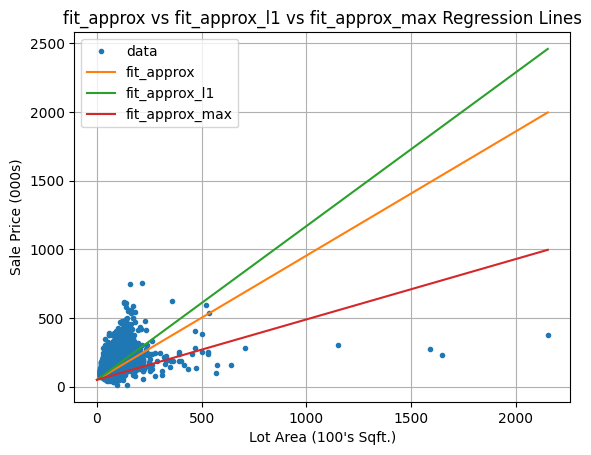

In [35]:
y = df['SalePrice'].values
x = df['Lot Area'].values/100 #scale Lot Area values to 100's of sqft to match SalePrice

x_beg = 0
x_end = x.max()
x_coordinates = np.arange(x_beg, x.max(), 1)



#get parameters and loss values
beta0_fit_approx, beta1_fit_approx, loss_fit_approx = fit_approx(x, y)
beta0_fit_approx_l1, beta1_fit_approx_l1, loss_fit_approx_l1 = fit_approx_l1(x, y)
beta0_fit_approx_max, beta1_fit_approx_max, loss_fit_approx_max = fit_approx_max(x, y)

#get predicted y values (SalePrice)
fit_approx_y_pred = beta0_fit_approx + x_coordinates * beta1_fit_approx
fit_approx_l1_y_pred = beta0_fit_approx_l1 + x_coordinates * beta1_fit_approx_l1
fit_approx_max_y_pred = beta0_fit_approx_max + x_coordinates * beta1_fit_approx_max


plt.plot(x, y, '.') # plot original scatter plot
plt.plot(x_coordinates,fit_approx_y_pred) #plot fit_approx regression line
plt.plot(x_coordinates,fit_approx_l1_y_pred) #plot fit_approx_l1 regression line
plt.plot(x_coordinates,fit_approx_max_y_pred) #plot fit_approx_max regression line
plt.grid(True)
plt.xlabel("Lot Area (100's Sqft.)")
plt.ylabel("Sale Price (000s)")
plt.title("fit_approx vs fit_approx_l1 vs fit_approx_max Regression Lines")
plt.legend(['data', 'fit_approx', 'fit_approx_l1', 'fit_approx_max'])
plt.show()

__How the choice of loss function effects the fit.__

The plot clearly shows that both fit_approx and fit_approx_l1 produce similar linear regression lines, with closely matching beta1 (slope) parameters of 0.905 and 1.120, respectively. In contrast, fit_approx_max yields a noticeably lower beta1 value of 0.44, indicating a weaker positive relationship between Lot Area and Sale Price. This difference arises because the $\ell_\infty$ (max) loss is highly sensitive to outliers; the maximum loss is typically dominated by a single extreme data point, which influences the fit. Notably, the beta0 (intercept) parameter is identical across all three regression methods, at 49.90. It is important to recognize that the range of beta0 and beta1 values considered by the approximation functions can significantly impact the estimated parameters and the relative slopes of the regression lines.

In [36]:
print(f"The fit_approx function returns beta0={beta0_fit_approx:,.2f} with beta1={beta1_fit_approx:.5f}")
print(f"The fit_approx_l1 function returns beta0={beta0_fit_approx_l1:,.2f} with beta1={beta1_fit_approx_l1:.5f}")
print(f"The fit_approx_max function returns beta0={beta0_fit_approx_max:,.2f} with beta1={beta1_fit_approx_max:.5f}")

The fit_approx function returns beta0=49.90 with beta1=0.90500
The fit_approx_l1 function returns beta0=49.90 with beta1=1.12000
The fit_approx_max function returns beta0=49.90 with beta1=0.44000
